In [1]:
import torch
import torch.nn as nn
import numpy as np

import datasets.datasets as dtset
import utils.losses as losses

from utils.weakener import Weakener
from models.model import MLP

from utils.trainig_testing import train_and_evaluate

import pickle
import matplotlib.pyplot as plt

In [2]:
f = open("Experimental_results(0.4)/ForwardBackward_VmI.pkl","rb")
k= pickle.load(f)
k['overall_results']

{0: {'train_loss': tensor([6.2445, 6.2444, 6.2444]),
  'train_acc': tensor([0.8125, 0.8566, 0.8668]),
  'test_acc': tensor([0.8934, 0.8898, 0.9112]),
  'train_detached_loss': tensor([0.0343, 0.0445, 0.0407])},
 1: {'train_loss': tensor([6.2445, 6.2444, 6.2444]),
  'train_acc': tensor([0.8141, 0.8544, 0.8680]),
  'test_acc': tensor([0.8815, 0.9043, 0.9059]),
  'train_detached_loss': tensor([0.0367, 0.0361, 0.0414])}}

In [3]:
k

{'overall_results': {'train_detached_loss': {'train_loss': array([1.8581231, 1.7327188, 1.7017833, 1.6847227, 1.6594808],
         dtype=float32),
   'train_acc': array([0.7838333 , 0.8340167 , 0.8448833 , 0.85463333, 0.8609333 ],
         dtype=float32),
   'test_acc': array([0.881 , 0.8829, 0.904 , 0.9133, 0.9137], dtype=float32),
   'train_detached_loss': array([0.04166363, 0.0393913 , 0.03815978, 0.03762387, 0.0350021 ],
         dtype=float32)}},
 'overall_models': {'train_detached_loss': MLP(
    (layers): ModuleList(
      (0): Linear(in_features=784, out_features=784, bias=True)
      (1): Linear(in_features=784, out_features=10, bias=True)
    )
    (batch_norms): ModuleList(
      (0): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (dropout): Dropout(p=0.5, inplace=False)
  )}}

In [12]:
f = open("Experimental_results(0.2)/Back.pkl","rb")
R = pickle.load(f)
f.close()
r = R['overall_results']['train_detached_loss']

Tr_loss_back = torch.vstack(tuple((r[i]['train_detached_loss'] for i in range(3))))
Tr_acc_back = torch.vstack(tuple((r[i]['train_acc'] for i in range(3))))
Te_acc_back = torch.vstack(tuple((r[i]['test_acc'] for i in range(3))))

KeyError: 0

In [33]:
f = open("Experimental_results(0.2)/Back_opt.pkl","rb")
R = pickle.load(f)
f.close()
r = R['overall_results']['train_detached_loss']

Tr_loss_back_opt = torch.vstack(tuple((r[i]['train_detached_loss'] for i in range(3))))
Tr_acc_back_opt = torch.vstack(tuple((r[i]['train_acc'] for i in range(3))))
Te_acc_back_opt = torch.vstack(tuple((r[i]['test_acc'] for i in range(3))))


In [37]:
f = open("Experimental_results(0.2)/Back_conv.pkl","rb")
Back_conv,Back_model_conv = pickle.load(f)
f.close()

Tr_loss_back_conv = torch.vstack(tuple((Back_conv[i]['train_loss'] for i in range(3))))
Tr_acc_back_conv = torch.vstack(tuple((Back_conv[i]['train_acc'] for i in range(3))))
Te_acc_back_conv = torch.vstack(tuple((Back_conv[i]['test_acc'] for i in range(3))))

In [ ]:
f = open("Experimental_results(0.2)/Back_opt_conv.pkl","rb")
Back_opt_conv,Back_model_opt_conv = pickle.load(f)
f.close()

Tr_loss_back_opt_conv = torch.vstack(tuple((Back_opt_conv[i]['train_loss'] for i in range(3))))
Tr_acc_back_opt_conv = torch.vstack(tuple((Back_opt_conv[i]['train_acc'] for i in range(3))))
Te_acc_back_opt_conv = torch.vstack(tuple((Back_opt_conv[i]['test_acc'] for i in range(3))))

In [43]:
f = open("Experimental_results(0.2)/EM.pkl","rb")
EM,EM_model = pickle.load(f)
f.close()

Tr_loss_EM = torch.vstack(tuple((EM[i]['train_loss'] for i in range(3))))
Tr_acc_EM = torch.vstack(tuple((EM[i]['train_acc'] for i in range(3))))
Te_acc_EM = torch.vstack(tuple((EM[i]['test_acc'] for i in range(3))))

In [47]:
f = open("Experimental_results(0.2)/OSL.pkl","rb")
OSL,OSL_model = pickle.load(f)
f.close()

Tr_loss_OSL = torch.vstack(tuple((OSL[i]['train_loss'] for i in range(3))))
Tr_acc_OSL = torch.vstack(tuple((OSL[i]['train_acc'] for i in range(3))))
Te_acc_OSL = torch.vstack(tuple((OSL[i]['test_acc'] for i in range(3))))

In [ ]:
f = open("Experimental_results(0.2)/Forward.pkl","rb")
FWD,FWD_model = pickle.load(f)
f.close()

Tr_loss_FWD = torch.vstack(tuple((FWD[i]['train_loss'] for i in range(3))))
Tr_acc_FWD = torch.vstack(tuple((FWD[i]['train_acc'] for i in range(3))))
Te_acc_FWD = torch.vstack(tuple((FWD[i]['test_acc'] for i in range(3))))

In [ ]:
f = open("Experimental_results(0.2)/ForwardBackward_I.pkl","rb")
FB_I,FBI_model = pickle.load(f)
f.close()

Tr_loss_FB_I = torch.vstack(tuple((FB_I[i]['train_loss'] for i in range(3))))
Tr_acc_FB_I = torch.vstack(tuple((FB_I[i]['train_acc'] for i in range(3))))
Te_acc_FB_I = torch.vstack(tuple((FB_I[i]['test_acc'] for i in range(3))))

In [ ]:
f = open("Experimental_results(0.2)/ForwardBackward_Y.pkl","rb")
FB_Y,FBY_model = pickle.load(f)
f.close()

Tr_loss_FB_Y = torch.vstack(tuple((FB_Y[i]['train_loss'] for i in range(3))))
Tr_acc_FB_Y = torch.vstack(tuple((FB_Y[i]['train_acc'] for i in range(3))))
Te_acc_FB_Y = torch.vstack(tuple((FB_Y[i]['test_acc'] for i in range(3))))

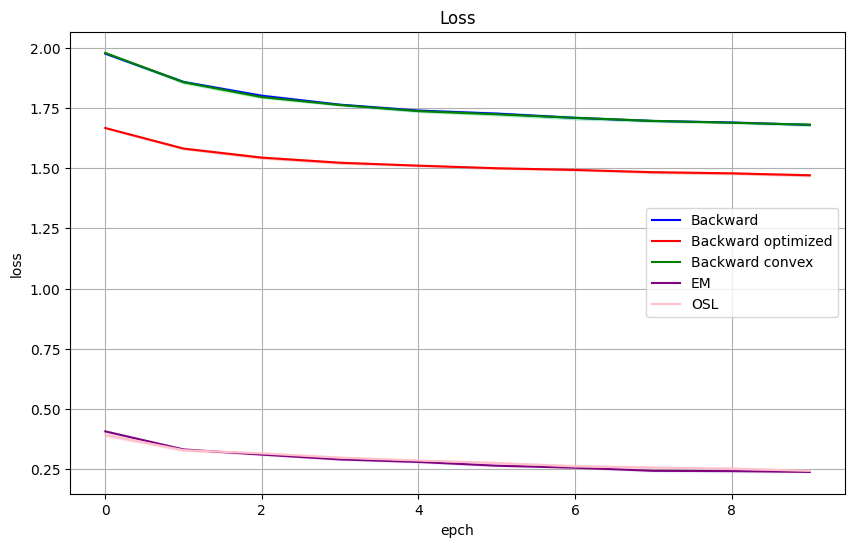

In [52]:
mlb = torch.mean(Tr_loss_back, dim=0).numpy()
slb = torch.std(Tr_loss_back, dim=0).numpy()
mlbo = torch.mean(Tr_loss_back_opt, dim=0).numpy()
slbo = torch.std(Tr_loss_back_opt, dim=0).numpy()
mlbc = torch.mean(Tr_loss_back_conv, dim=0).numpy()
slbc = torch.std(Tr_loss_back_conv, dim=0).numpy()
mem = torch.mean(Tr_loss_EM, dim=0).numpy()
sem = torch.std(Tr_loss_EM, dim=0).numpy()
mosl = torch.mean(Tr_loss_OSL, dim=0).numpy()
sosl = torch.std(Tr_loss_OSL, dim=0).numpy()



mosl = torch.mean(Tr_loss_OSL, dim=0).numpy()
sosl = torch.std(Tr_loss_OSL, dim=0).numpy()
mosl = torch.mean(Tr_loss_OSL, dim=0).numpy()
sosl = torch.std(Tr_loss_OSL, dim=0).numpy()
mosl = torch.mean(Tr_loss_OSL, dim=0).numpy()
sosl = torch.std(Tr_loss_OSL, dim=0).numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mlb, label='Backward', color='blue')
plt.plot(mlbo, label='Backward optimized', color='red')
plt.plot(mlbc, label='Backward convex', color='green')
plt.plot(mem, label='EM', color='purple')
plt.plot(mosl, label='OSL', color='pink')

plt.fill_between(range(mlb.shape[0]), mlb-slb, mlb+slb, color='skyblue', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mlbo-slbo, mlbo+slbo, color='lightcoral', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mlbc-slbc, mlbc+slbc, color='lightgreen', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mem-sem, mem+sem, color='lavender', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mosl-sosl, mosl+sosl, color='lightpink', alpha=0.4)

plt.title('Loss')
plt.xlabel('epch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

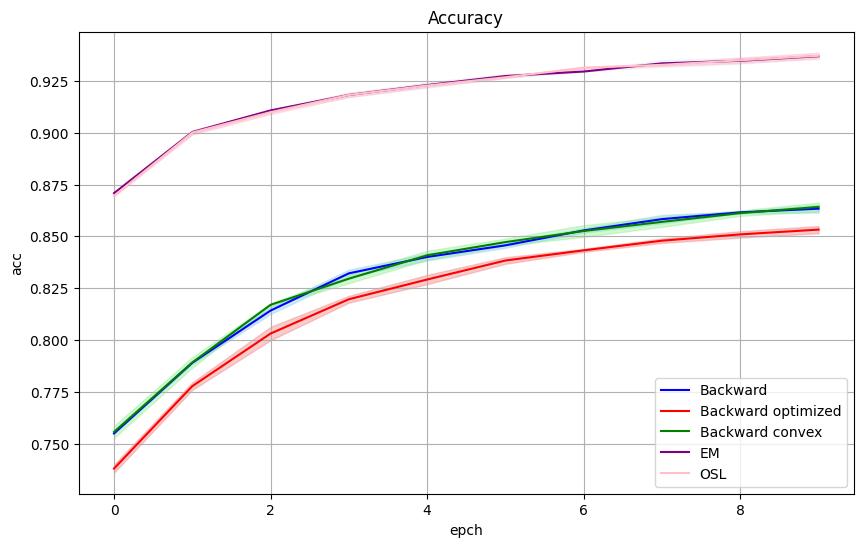

In [53]:
mlb = torch.mean(Tr_acc_back, dim=0).numpy()
slb = torch.std(Tr_acc_back, dim=0).numpy()
mlbo = torch.mean(Tr_acc_back_opt, dim=0).numpy()
slbo = torch.std(Tr_acc_back_opt, dim=0).numpy()
mlbc = torch.mean(Tr_acc_back_conv, dim=0).numpy()
slbc = torch.std(Tr_acc_back_conv, dim=0).numpy()
mem = torch.mean(Tr_acc_EM, dim=0).numpy()
sem = torch.std(Tr_acc_EM, dim=0).numpy()
mosl = torch.mean(Tr_acc_OSL, dim=0).numpy()
sosl = torch.std(Tr_acc_OSL, dim=0).numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mlb, label='Backward', color='blue')
plt.plot(mlbo, label='Backward optimized', color='red')
plt.plot(mlbc, label='Backward convex', color='green')
plt.plot(mem, label='EM', color='purple')
plt.plot(mosl, label='OSL', color='pink')

plt.fill_between(range(mlb.shape[0]), mlb-slb, mlb+slb, color='skyblue', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mlbo-slbo, mlbo+slbo, color='lightcoral', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mlbc-slbc, mlbc+slbc, color='lightgreen', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mem-sem, mem+sem, color='lavender', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mosl-sosl, mosl+sosl, color='lightpink', alpha=0.4)

plt.title('Accuracy')
plt.xlabel('epch')
plt.ylabel('acc')
plt.legend()
plt.grid(True)
plt.show()